# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report 
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [27]:
try: 
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv(r'C:\Users\QWE\Documents\Проекты для GitHub\7\Churn.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [29]:
df.shape

(10000, 14)

In [30]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [31]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [32]:
df.duplicated().sum()

0

In [33]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [34]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1 )


df.dropna(subset=['Tenure'], inplace=True)
df['Tenure']= df['Tenure'].astype('int64')

In [35]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Вывод: Данные загружены и изучены. Удалены столбцы - 'RowNumber', 'CustomerId', 'Surname', как столбцы не несущие какой-то значимой информации. Проверено на дубликаты, пропуски (df['Tenure'] заполнил нулем) 

## Исследование задачи

Данные подготовим методом OHE

In [38]:
df = pd.get_dummies(df, drop_first=True, columns=['Geography', 'Gender']) 

In [39]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [40]:
features = df.drop('Exited', axis=1)
target = df['Exited']

features_train, features_validtest, target_train, target_validtest = train_test_split(features, target, 
                                                                                      train_size=0.6, random_state=12345)

In [41]:
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,  target_validtest,
                                                                            train_size=0.5, random_state=12345)

In [42]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [43]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,0.809075,-1.039327,-1.025995,0.554904,-0.908179,1,0,0.019508,False,False,False
3796,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0,0,0.056167,False,False,True
7462,-0.398853,0.090079,1.385532,-1.237830,-0.908179,1,1,0.848738,False,False,True
1508,-0.749875,-0.286389,0.352020,-1.237830,0.809300,1,1,-0.894953,False,False,True
4478,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,0,1,-1.284516,False,False,True


<div class="alert alert-info"> Масштабируем:

In [44]:
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7445,-1.369326,0.560665,-0.336987,-1.237830,-0.908179,1,0,-0.086537,False,False,False
8620,1.232367,0.090079,1.041028,-1.237830,0.809300,0,1,-0.537457,False,False,False
1714,0.840048,0.560665,0.352020,1.231363,-0.908179,0,0,1.070393,True,False,True
5441,1.056856,-0.945210,-1.370498,0.951231,-0.908179,1,0,-0.576279,False,False,True
9001,0.406433,-0.662858,0.352020,0.767800,-0.908179,1,1,0.662068,False,True,True


In [45]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5170,1.707279,-0.756975,-0.336987,-1.237830,0.809300,1,1,0.718362,False,False,False
4180,-0.429826,-0.286389,1.730036,0.485538,0.809300,0,0,1.687305,True,False,True
7349,-0.171721,0.278313,0.352020,-0.269213,0.809300,0,1,0.824128,True,False,True
7469,0.385784,-0.380507,1.041028,0.464813,-0.908179,1,0,-1.118018,False,False,False
3467,-1.142194,0.278313,-1.370498,0.353837,0.809300,0,1,-0.107642,True,False,False


In [46]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=12345)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:" "дерево решений", DTC_score, "случайный лес ", RFC_score, "логистическая регрессия", LgR_score)

In [47]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.7904290429042904 случайный лес  0.8652365236523653 логистическая регрессия 0.8085808580858086


## Борьба с дисбалансом

In [48]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.796062
1    0.203938
Name: proportion, dtype: float64

<Axes: ylabel='Frequency'>

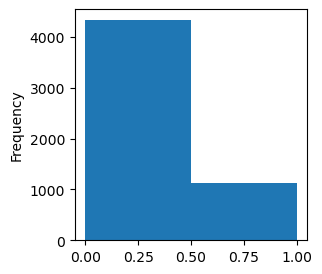

In [49]:
target_train.plot(kind ='hist', bins=2, figsize=(3,3))

<div class="alert alert-info"> Классы несбалансированы, так как 80% отрицательных против 20% положительных

<div class="alert alert-info"> Функция для изучия полноты, точности и F1-меры

In [50]:
def rec_prec_f1(target_valid, prediction):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))

<div class="alert alert-info"> Функция для отображения соотношения ответов моделей (сколько 0, сколько 1)

In [51]:
def all_models_share(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345)
    model_DTC.fit(features_train, target_train)
    DTC_share = pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1)
           
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model_RFC.fit(features_train, target_train)
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(features_train, target_train)
    LgR_share = pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1)
        
    print("Доли ответов:" "Дерево решений", DTC_share, "Случайный лес ",
          RFC_share, "Логистческая регрессия", LgR_share , end='')

<div class="alert alert-info"> Применим функцию отображения соотношения ответов моделей

In [52]:
all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:Дерево решений 0    0.794279
1    0.205721
Name: proportion, dtype: float64 Случайный лес  0    0.874587
1    0.125413
Name: proportion, dtype: float64 Логистческая регрессия 0    0.932343
1    0.067657
Name: proportion, dtype: float64

<div class="alert alert-info"> Логистическая регрессия показывает самую высокую точность, потом случайный лес и в конце дерево решений!

С учетом дисбаланса результата модели с большой вероятностью будут выдавать ответ 0, построим матрицы ошибок для моделей


<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Да, все верно, высокая точность, но проблема та в том, что ты метрика не подходит по задача...
</div>


<div class="alert alert-info"> RandomForestClassifier

In [53]:
best_f1_rfc = 0
best_depth_rfc = 0
best_est_rfc = 0
best_roc_auc_score_rfc = 0
for depth in range(1, 10):
    for est in range(1, 100):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rfc.fit(features_train, target_train)
        predicted_valid_rfc = rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        roc_auc_score_rfc = roc_auc_score(target_valid, rfc.predict_proba(features_valid)[:,1])
        if f1_rfc > best_f1_rfc:
            best_f1_rfc = f1_rfc
            best_depth_rfc = depth
            best_est_rfc = est
            best_roc_auc_score_rfc = roc_auc_score_rfc
            
print('F1 для случайного леса =', best_f1_rfc)
print('Максимальная глубина =', best_depth_rfc)
print('Число деревьев =', best_est_rfc)
print('AUC-ROC =', best_roc_auc_score_rfc)

F1 для случайного леса = 0.5793103448275863
Максимальная глубина = 8
Число деревьев = 15
AUC-ROC = 0.8655755931354773


In [54]:
model_RFC = RandomForestClassifier(random_state=12345, max_depth=8, n_estimators = 15)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)
confusion_matrix(target_valid, RFC_prediction)

array([[1406,   35],
       [ 209,  168]], dtype=int64)

In [55]:
rec_prec_f1(target_valid, RFC_prediction)

Полнота 0.44562334217506633
Точность 0.8275862068965517
F1-мера 0.5793103448275863


<div class="alert alert-info"> Расчет roc_auc_RFC

In [56]:
RFC_probabilities_one_valid = model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)
auc_roc_RFC

0.8655755931354773

<div class="alert alert-info"> Случайный лес дает примерно равную долю позитивных и негативных предсказаний. Больше качественных предсказаний, но также дает ложно позитивные предсказания. 

<div class="alert alert-info"> Дерево решений

<div class="alert alert-info"> Матрица ошибок: 

In [57]:
best_f1_dtc = 0
best_depth_dtc = 0
best_auc_roc = 0
for depth in range(1, 15):
    dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dtc.fit(features_train, target_train)
    predicted_valid_dtc = dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    auc_roc_dtc = roc_auc_score(target_valid, dtc.predict_proba(features_valid)[:, 1])
    print("F1 = {:.3f}, AUC-ROC = {:.3f}".format(f1_dtc, auc_roc_dtc), 'на шаге', depth)
    if f1_dtc > best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_depth_dtc = depth
        best_auc_roc = auc_roc_dtc
        
print()
print('F1 для дерева решений =', best_f1_dtc)
print('Максимальная глубина =', best_depth_dtc)
print('AUC-ROC =', best_auc_roc)

F1 = 0.000, AUC-ROC = 0.703 на шаге 1
F1 = 0.530, AUC-ROC = 0.755 на шаге 2
F1 = 0.373, AUC-ROC = 0.799 на шаге 3
F1 = 0.541, AUC-ROC = 0.821 на шаге 4
F1 = 0.514, AUC-ROC = 0.847 на шаге 5
F1 = 0.561, AUC-ROC = 0.850 на шаге 6
F1 = 0.576, AUC-ROC = 0.835 на шаге 7
F1 = 0.541, AUC-ROC = 0.807 на шаге 8
F1 = 0.545, AUC-ROC = 0.794 на шаге 9
F1 = 0.512, AUC-ROC = 0.757 на шаге 10
F1 = 0.513, AUC-ROC = 0.714 на шаге 11
F1 = 0.479, AUC-ROC = 0.701 на шаге 12
F1 = 0.483, AUC-ROC = 0.681 на шаге 13
F1 = 0.486, AUC-ROC = 0.675 на шаге 14

F1 для дерева решений = 0.5764331210191083
Максимальная глубина = 7
AUC-ROC = 0.8346049843812412


In [58]:
model_DTC = DecisionTreeClassifier(random_state=12345, max_depth= 7)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)
confusion_matrix(target_valid, DTC_prediction)

array([[1371,   70],
       [ 196,  181]], dtype=int64)

In [59]:
rec_prec_f1(target_valid, DTC_prediction)

Полнота 0.48010610079575594
Точность 0.7211155378486056
F1-мера 0.5764331210191083


In [60]:
DTC_probabilities_one_valid = model_DTC.predict_proba(features_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, DTC_probabilities_one_valid)
auc_roc_DTC

0.8346049843812412

<div class="alert alert-info"> f1 низкое значение, поэтому качесвто модели низкое.

<div class="alert alert-info"> Логистическая регрессия


<div class="alert alert-info"> Матрица ошибок:

In [61]:
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_prediction = model_LgR.predict(features_valid)
confusion_matrix(target_valid, LgR_prediction)

array([[1394,   47],
       [ 301,   76]], dtype=int64)

In [62]:
rec_prec_f1(target_valid, LgR_prediction)

Полнота 0.20159151193633953
Точность 0.6178861788617886
F1-мера 0.30400000000000005


In [63]:
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]
auc_roc_LgR = roc_auc_score(target_valid, LgR_probabilities_one_valid)
auc_roc_LgR

0.7736191158144302

In [64]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.legend()
    plt.show()

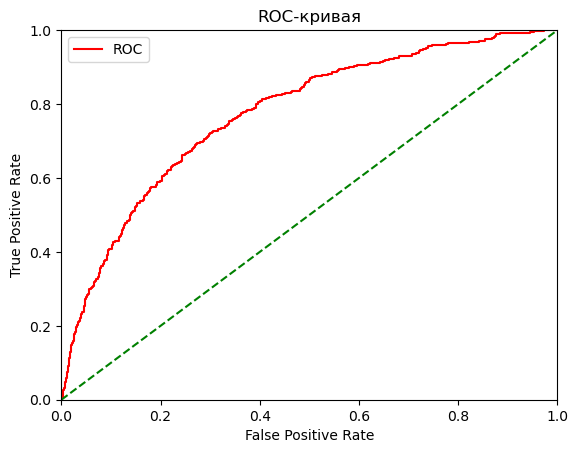

In [65]:
fper, tper, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid)
plot_roc_curve(fper, tper)

Score 0.8085808580858086
AUC-ROC 0.7736191158144302


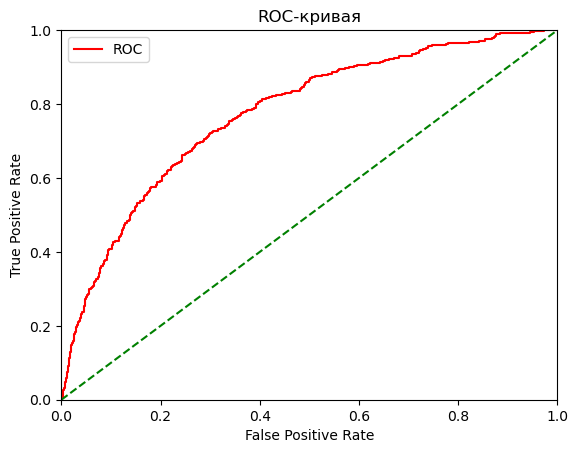

In [66]:
model_LgR = LogisticRegression(solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_probabilities_one_valid_class_weight = model_LgR.predict_proba(features_valid)[:, 1]
print("Score", model_LgR.score(features_valid, target_valid))
print("AUC-ROC", roc_auc_score(target_valid, LgR_probabilities_one_valid_class_weight))

fper, tper, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid_class_weight) 
plot_roc_curve(fper, tper)

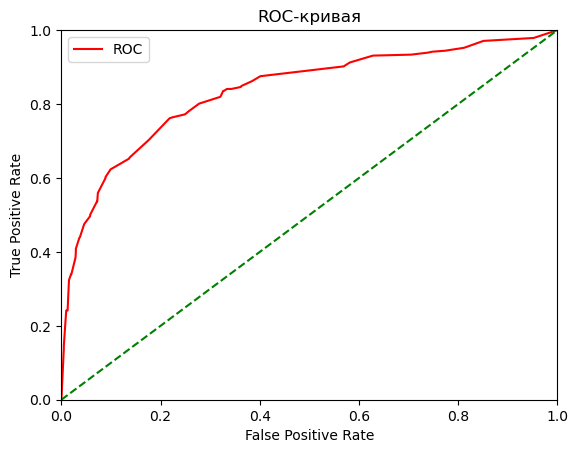

In [67]:
DTC_probabilities_one_valid = model_DTC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, DTC_probabilities_one_valid)
 
fper, tper, thresholds = roc_curve(target_valid, DTC_probabilities_one_valid)
plot_roc_curve(fper, tper)

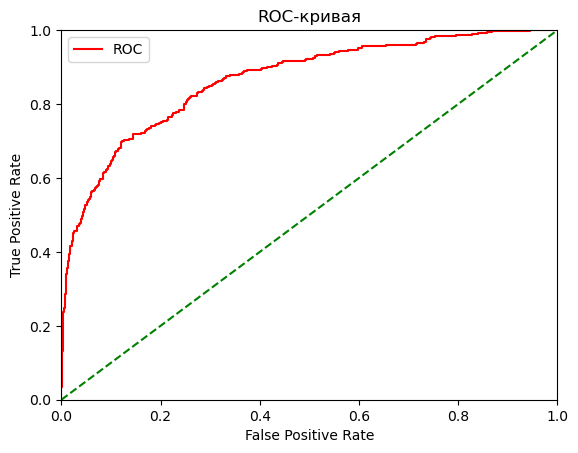

In [68]:
RFC_probabilities_one_valid = model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)
 
fper, tper, thresholds = roc_curve(target_valid, RFC_probabilities_one_valid)
plot_roc_curve(fper, tper)

In [69]:
def upsample(features, target, repeat, upsampled_сlass):
 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
    return features_upsampled, target_upsampled

In [70]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

<div class="alert alert-info"> Протестируем функции:

In [71]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

Exited
0    0.93893
1    0.06107
Name: proportion, dtype: float64
(18438,)


In [72]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
features_train_upsampled

0

<div class="alert alert-info"> Применим функцию upsample -увеличим количество положительных ответов в 4 раза

In [73]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

Exited
1    0.509964
0    0.490036
Name: proportion, dtype: float64
(8832,)


<div class="alert alert-info"> Применив функцию downsample, уменьшим количество положительных ответов в 4 раза.
Протестируем функцию

In [74]:
features_downsampled_train, target_downsampled_train = downsample(features_train, target_train, 0.2)
print(target_downsampled_train.value_counts(normalize = 0))
print(target_downsampled_train.shape)

Exited
1    1126
0     866
Name: count, dtype: int64
(1992,)


<Axes: ylabel='Frequency'>

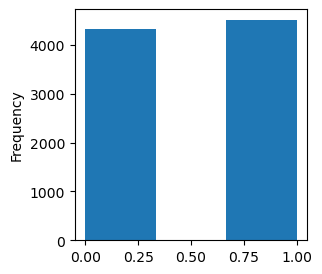

In [75]:
target_train_upsampled.plot(kind ='hist', bins=3, figsize=(3,3))

In [76]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:дерево решений 0.7904290429042904 случайный лес  0.8652365236523653 логистическая регрессия 0.8085808580858086


<div class="alert alert-info"> Точность моделей на сбалансированной выборке:

In [77]:
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:дерево решений 0.7821782178217822 случайный лес  0.7948294829482948 логистическая регрессия 0.7013201320132013


<div class="alert alert-info"> Без сильных изменений. Проверим качество ответов. Решающее дерево:

In [78]:
model_DTC_upsampled = DecisionTreeClassifier(random_state=12345)
model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction_upsampled = model_DTC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, DTC_prediction_upsampled)

Полнота 0.4509283819628647
Точность 0.4735376044568245
F1-мера 0.46195652173913043


<div class="alert alert-info"> Расчитаем auc_roc для DTC на сбалансированной выборке:

In [79]:
DTC_upsampled_valid = model_DTC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, DTC_upsampled_valid)
auc_roc_DTC

0.6598847322722027

<div class="alert alert-info"> Случайный лес RFC 

In [80]:
model_RFC_upsampled = RandomForestClassifier( max_depth=8, n_estimators = 15, min_samples_leaf=3, random_state=12345)
model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_upsampled = model_RFC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_upsampled)

Полнота 0.7453580901856764
Точность 0.5203703703703704
F1-мера 0.6128680479825518


<div class="alert alert-info"> Расчитаем auc_roc для RFC на сбалансированной выборке

In [81]:
RFC_upsampled_valid = model_RFC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_upsampled_valid)
auc_roc_RFC

0.8588136001929105

<div class="alert alert-info"> Логистическая регрессия

In [82]:
model_LgR_upsampled = LogisticRegression(solver = 'liblinear')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction_upsampled = model_LgR_upsampled.predict(features_valid)
rec_prec_f1(target_valid, LgR_prediction_upsampled)

Полнота 0.7453580901856764
Точность 0.385989010989011
F1-мера 0.5085972850678734


<div class="alert alert-info"> Расчитаем auc_roc для LgR на сбалансированной выборке

In [83]:
LgR_upsampled_valid = model_LgR_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_LgR = roc_auc_score(target_valid, LgR_upsampled_valid)
auc_roc_LgR

0.7779006989325494

In [84]:
all_models_accuracy(features_downsampled_train, target_downsampled_train, features_valid, target_valid)

Точность:дерево решений 0.680968096809681 случайный лес  0.7156215621562156 логистическая регрессия 0.6490649064906491


In [85]:
features_downsampled_train, target_train_downsampled = downsample(features_train, target_train, 0.5)
print(target_train_downsampled.value_counts(normalize = 1))
print(target_train_downsampled.shape)

Exited
0    0.657751
1    0.342249
Name: proportion, dtype: float64
(3290,)


In [86]:
features_train_downsampled, target_train_downsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

Exited
1    0.509964
0    0.490036
Name: proportion, dtype: float64
(8832,)


<Axes: ylabel='Frequency'>

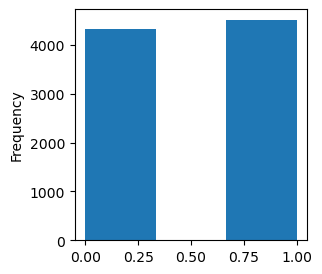

In [87]:
target_train_downsampled.plot(kind ='hist', bins=3, figsize=(3,3))

In [88]:
best_f1_dtc = 0
best_depth_dtc_ups = 0
best_auc_roc = 0
for depth in range(1, 15):
    dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dtc.fit(features_train_upsampled, target_train_upsampled)
    predicted_valid_dtc = dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    auc_roc_dtc = roc_auc_score(target_valid, dtc.predict_proba(features_valid)[:, 1])
    print("F1 = {:.3f}, AUC-ROC = {:.3f}".format(f1_dtc, auc_roc_dtc), 'на шаге', depth)
    if f1_dtc > best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_depth_dtc_ups = depth
        best_auc_roc = auc_roc_dtc

print('Максимальная глубина =', best_depth_dtc)


model_DTC_ups = DecisionTreeClassifier(random_state=12345, max_depth= best_depth_dtc_ups)
model_DTC_ups.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction_ups = model_DTC_ups.predict(features_valid)
rec_prec_f1(target_valid, DTC_prediction_ups)

F1 = 0.507, AUC-ROC = 0.707 на шаге 1
F1 = 0.530, AUC-ROC = 0.758 на шаге 2
F1 = 0.549, AUC-ROC = 0.795 на шаге 3
F1 = 0.546, AUC-ROC = 0.818 на шаге 4
F1 = 0.574, AUC-ROC = 0.840 на шаге 5
F1 = 0.563, AUC-ROC = 0.832 на шаге 6
F1 = 0.541, AUC-ROC = 0.811 на шаге 7
F1 = 0.558, AUC-ROC = 0.790 на шаге 8
F1 = 0.516, AUC-ROC = 0.766 на шаге 9
F1 = 0.506, AUC-ROC = 0.730 на шаге 10
F1 = 0.515, AUC-ROC = 0.716 на шаге 11
F1 = 0.502, AUC-ROC = 0.693 на шаге 12
F1 = 0.481, AUC-ROC = 0.673 на шаге 13
F1 = 0.481, AUC-ROC = 0.674 на шаге 14
Максимальная глубина = 7
Полнота 0.7188328912466844
Точность 0.477112676056338
F1-мера 0.5735449735449736


In [89]:
best_f1_rfc = 0
best_depth_rfc_ups = 0
best_est_rfc_ups = 0
best_roc_auc_score_rfc = 0
for depth in range(1, 10):
    for est in range(1, 100):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rfc.fit(features_train_upsampled, target_train_upsampled)
        predicted_valid_rfc = rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        roc_auc_score_rfc = roc_auc_score(target_valid, rfc.predict_proba(features_valid)[:,1])
        if f1_rfc > best_f1_rfc:
            best_f1_rfc = f1_rfc
            best_depth_rfc_ups = depth
            best_est_rfc_ups = est
            best_roc_auc_score_rfc = roc_auc_score_rfc
            
print('F1 для случайного леса =', best_f1_rfc)
print('Максимальная глубина =', best_depth_rfc)
print('Число деревьев =', best_est_rfc)
print('AUC-ROC =', best_roc_auc_score_rfc)


model_RFC_ups = RandomForestClassifier(max_depth= best_depth_rfc_ups, n_estimators = best_est_rfc_ups, random_state=12345)
model_RFC_ups.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_ups = model_RFC_ups.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_ups)

F1 для случайного леса = 0.6308571428571429
Максимальная глубина = 8
Число деревьев = 15
AUC-ROC = 0.8690122722762891
Полнота 0.7320954907161804
Точность 0.5542168674698795
F1-мера 0.6308571428571429


In [90]:
best_f1_dtc = 0
best_depth_dtc_dwn = 0
best_auc_roc = 0
for depth in range(1, 15):
    dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dtc.fit(features_train_downsampled, target_train_downsampled)
    predicted_valid_dtc = dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_valid_dtc)
    auc_roc_dtc = roc_auc_score(target_valid, dtc.predict_proba(features_valid)[:, 1])
    print("F1 = {:.3f}, AUC-ROC = {:.3f}".format(f1_dtc, auc_roc_dtc), 'на шаге', depth)
    if f1_dtc > best_f1_dtc:
        best_f1_dtc = f1_dtc
        best_depth_dtc_dwn = depth
        best_auc_roc = auc_roc_dtc

print('Максимальная глубина =', best_depth_dtc)


model_DTC_downsampled = DecisionTreeClassifier(random_state=12345, max_depth= best_depth_dtc_dwn)
model_DTC_downsampled.fit(features_train_downsampled, target_train_downsampled)
DTC_prediction_downsampled = model_DTC_downsampled.predict(features_valid)
rec_prec_f1(target_valid, DTC_prediction_downsampled)

F1 = 0.507, AUC-ROC = 0.707 на шаге 1
F1 = 0.530, AUC-ROC = 0.758 на шаге 2
F1 = 0.549, AUC-ROC = 0.795 на шаге 3
F1 = 0.546, AUC-ROC = 0.818 на шаге 4
F1 = 0.574, AUC-ROC = 0.840 на шаге 5
F1 = 0.563, AUC-ROC = 0.832 на шаге 6
F1 = 0.541, AUC-ROC = 0.811 на шаге 7
F1 = 0.558, AUC-ROC = 0.790 на шаге 8
F1 = 0.516, AUC-ROC = 0.766 на шаге 9
F1 = 0.506, AUC-ROC = 0.730 на шаге 10
F1 = 0.515, AUC-ROC = 0.716 на шаге 11
F1 = 0.502, AUC-ROC = 0.693 на шаге 12
F1 = 0.481, AUC-ROC = 0.673 на шаге 13
F1 = 0.481, AUC-ROC = 0.674 на шаге 14
Максимальная глубина = 7
Полнота 0.7188328912466844
Точность 0.477112676056338
F1-мера 0.5735449735449736


In [91]:
best_f1_rfc = 0
best_depth_rfc_dwn = 0
best_est_rfc_dwn = 0
best_roc_auc_score_rfc = 0
for depth in range(1, 10):
    for est in range(1, 100):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        rfc.fit(features_train_downsampled, target_train_downsampled)
        predicted_valid_rfc = rfc.predict(features_valid)
        f1_rfc = f1_score(target_valid, predicted_valid_rfc)
        roc_auc_score_rfc = roc_auc_score(target_valid, rfc.predict_proba(features_valid)[:,1])
        if f1_rfc > best_f1_rfc:
            best_f1_rfc = f1_rfc
            best_depth_rfc_dwn = depth
            best_est_rfc_dwn = est
            best_roc_auc_score_rfc = roc_auc_score_rfc
            
print('F1 для случайного леса =', best_f1_rfc)
print('Максимальная глубина =', best_depth_rfc)
print('Число деревьев =', best_est_rfc)
print('AUC-ROC =', best_roc_auc_score_rfc)


model_RFC_downsampled = RandomForestClassifier(max_depth= best_depth_rfc_dwn, n_estimators = best_est_rfc_dwn, random_state=12345)
model_RFC_downsampled.fit(features_train_downsampled, target_train_downsampled)
RFC_prediction_downsampled = model_RFC_downsampled.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_downsampled)

F1 для случайного леса = 0.6308571428571429
Максимальная глубина = 8
Число деревьев = 15
AUC-ROC = 0.8690122722762891
Полнота 0.7320954907161804
Точность 0.5542168674698795
F1-мера 0.6308571428571429


In [92]:
RFC_downsampled_valid = model_RFC_downsampled.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_downsampled_valid)
auc_roc_RFC

0.8690122722762891

In [93]:
model_LgR_downsampled = LogisticRegression(solver = 'liblinear')
model_LgR_downsampled.fit(features_train_downsampled, target_train_downsampled)
LgR_prediction_downsampled = model_LgR_downsampled.predict(features_valid)
rec_prec_f1(target_valid, LgR_prediction_downsampled)

Полнота 0.7453580901856764
Точность 0.385989010989011
F1-мера 0.5085972850678734


In [94]:
LgR_downsampled_valid = model_LgR_downsampled.predict_proba(features_valid)[:, 1]
auc_roc_LgR = roc_auc_score(target_valid, LgR_downsampled_valid)
auc_roc_LgR

0.7779006989325494

<div class="alert alert-info"> У всех моделей улучшились показатели, самые лучшие у RFC. f1=0.61

## Тестирование модели

<div class="alert alert-info"> Обучим финальную модель. 

In [95]:
model_RFC_final = RandomForestClassifier(
     max_depth= best_depth_rfc_ups, n_estimators = best_est_rfc_ups, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)

model_RFC_final_prediction = model_RFC_final.predict(features_test)
rec_prec_f1(target_test, model_RFC_final_prediction)




Полнота 0.698005698005698
Точность 0.5157894736842106
F1-мера 0.5932203389830508


<div class="alert alert-info"> Расчитаем auc_roc для RFC на тестовой выборке

In [96]:
model_RFC_final_test = model_RFC_final.predict_proba(features_test)[:, 1]
auc_roc_RFC = roc_auc_score(target_test, model_RFC_final_test)
auc_roc_RFC

0.8611033481605689

<div class="alert alert-info"> Создаем константную модель для проверки

In [97]:
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()
print('accuracy_score константой модели:', accuracy_score(target_test, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_RFC_final_prediction))

accuracy_score константой модели: 0.8070368334249588
accuracy_score финальной модели: 0.8152831225948324


<div class="alert alert-info"> Модель показывает результаты лучше константной модели

<div class="alert alert-info">
    Выводы: 
1) Изначально в данных был дисбаланс, 80% против 20% позитивных. Модели на исходных данных часто ошибались и имели низкое качество f1

2) Убрали дисбаланс классов методом Upsampling и Downsampling, увеличили количество значений позитивного класса в 4 раза.

3) Новые данные скорректировали результаты. Лучший результат у случайного леса

<div class="alert alert-info"> 
    
Финальная модель прошла проверку и имеет следующие показатели: 

Полнота 0.7210401891252955
Точность 0.5152027027027027
F1-мера 0.6009852216748769

AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8493323799115837